In [1]:
import re
import time
import pickle
import os
import numpy as np
import pandas as pd
from itertools import *
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
from textwrap import dedent
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.feature_selection import VarianceThreshold
import datetime
import math
# from plotnine import *
from sklearn.metrics import brier_score_loss
from sklearn.utils import column_or_1d

In [2]:
df = pd.read_csv('../data/ny_cd_22_l2_2016_10_23_featureset_1295.csv', error_bad_lines=False)

In [3]:
df.columns.tolist()

['Unnamed: 0',
 'ispsa',
 'dwelling_type_single_family_dwelling_unit',
 'dwelling_type_multi_family_dwelling',
 'dwelling_type_null',
 'dwelling_unit_size_1_single_family_dwelling',
 'dwelling_unit_size_2_duplex',
 'dwelling_unit_size_3_triplex',
 'dwelling_unit_size_101',
 'dwelling_unit_size_5_9',
 'dwelling_unit_size_20_49',
 'dwelling_unit_size_50_100',
 'dwelling_unit_size_4',
 'dwelling_unit_size_10_19',
 'dwelling_unit_size_null',
 'estimated_income_amount',
 'hh_upscale_buyer',
 'hh_upscale_male_buyer',
 'hh_upscale_female_buyer',
 'hh_book_buyer',
 'hh_family_magazine',
 'hh_female_oriented_magazine',
 'hh_religious_magazine',
 'hh_gardening_magazine',
 'hh_culinary_interest_magazine',
 'hh_health_fitness_magazine',
 'hh_do_it_yourselfer_magazine',
 'hh_financial_magazine',
 'hh_religious_contributor',
 'hh_political_contributer',
 'hh_donates_environment_cause_u',
 'hh_donates_environment_cause_y',
 'hh_donates_environment_cause_null',
 'hh_donates_to_charity_y',
 'hh_donates

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394708 entries, 0 to 394707
Columns: 545 entries, Unnamed: 0 to lalvoterid
dtypes: float64(543), int64(1), object(1)
memory usage: 1.6+ GB


In [5]:
df.shape

(394708, 545)

In [6]:
df.isnull().sum().tolist()

[0,
 30378,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 24516,
 183247,
 183247,
 183247,
 183247,
 183247,
 183247,
 183247,
 183247,
 183247,
 183247,
 183247,
 183247,
 170408,
 158738,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 183247,
 312412,
 183247,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 24385,
 30378,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30378,
 30378,
 30378,
 30378,
 30378,
 30378,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2731,
 2731,
 2731,
 2731,
 2731,
 2731,
 2731,
 2731,
 2731,
 2731,
 2731,
 2731,
 2731,


In [7]:
print(df.describe())

          Unnamed: 0          ispsa  \
count  394708.000000  364330.000000   
mean   197353.500000       4.269621   
std    113942.529362       2.047915   
min         0.000000       0.000000   
25%     98676.750000       3.000000   
50%    197353.500000       4.000000   
75%    296030.250000       6.000000   
max    394707.000000       9.000000   

       dwelling_type_single_family_dwelling_unit  \
count                              394708.000000   
mean                                    0.589654   
std                                     0.491897   
min                                     0.000000   
25%                                     0.000000   
50%                                     1.000000   
75%                                     1.000000   
max                                     1.000000   

       dwelling_type_multi_family_dwelling  dwelling_type_null  \
count                        394708.000000       394708.000000   
mean                              0.190440     

(array([24275., 23607., 23284., 21817., 19541., 20560., 18737., 27365.,
        32003., 32626., 29839., 26464., 21987., 13820., 13952., 11191.,
         8288.,  5744.,  2941.,   993.]),
 array([18.  , 21.85, 25.7 , 29.55, 33.4 , 37.25, 41.1 , 44.95, 48.8 ,
        52.65, 56.5 , 60.35, 64.2 , 68.05, 71.9 , 75.75, 79.6 , 83.45,
        87.3 , 91.15, 95.  ]),
 <a list of 20 Patch objects>)

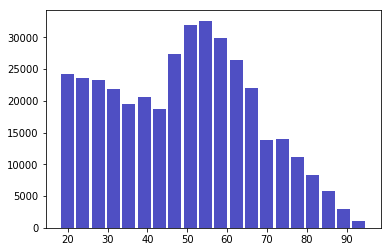

In [8]:
plt.hist(x=df['age'].dropna(), bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

(array([12545.,  5908.,  5822.,  6239.,  5938.,  5678.,  5752.,  6052.,
         5973.,  5715., 11277.,  5480.,  5410.,  5194.,  5013.,  4870.,
         4737.,  4921.,  4888.,  4838., 10834.,  6174.,  6311.,  6252.,
         6238.,  6527.,  7006.,  7594.,  7685.,  7957., 16361.,  8222.,
         8206.,  8277.,  7921.,  7734.,  7656.,  7252.,  7197.,  6980.,
        13079.,  6405.,  6819.,  5868.,  4646.,  4654.,  4891.,  4753.,
         4176.,  3835.,  6935.,  3182.,  3172.,  2849.,  2743.,  2427.,
         2314.,  2104.,  2100.,  1770.,  3232.,  1316.,  1196.,  1025.,
          818.,   595.,   503.,   397.,   275.,   321.]),
 array([18. , 19.1, 20.2, 21.3, 22.4, 23.5, 24.6, 25.7, 26.8, 27.9, 29. ,
        30.1, 31.2, 32.3, 33.4, 34.5, 35.6, 36.7, 37.8, 38.9, 40. , 41.1,
        42.2, 43.3, 44.4, 45.5, 46.6, 47.7, 48.8, 49.9, 51. , 52.1, 53.2,
        54.3, 55.4, 56.5, 57.6, 58.7, 59.8, 60.9, 62. , 63.1, 64.2, 65.3,
        66.4, 67.5, 68.6, 69.7, 70.8, 71.9, 73. , 74.1, 75.2, 76.3, 77

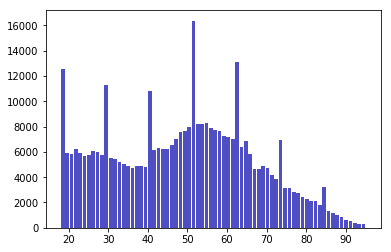

In [9]:
plt.hist(x=df['age'].dropna(), bins=70, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

(array([ 66009., 157552.,  94882.,  30050.,  10751.,   4910.,   1521.,
          4517.]),
 array([  6000.,  36500.,  67000.,  97500., 128000., 158500., 189000.,
        219500., 250000.]),
 <a list of 8 Patch objects>)

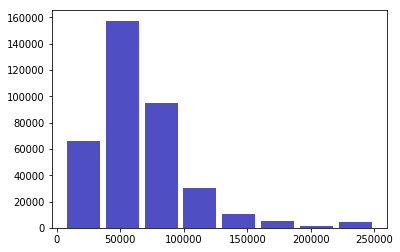

In [10]:
plt.hist(x=df['estimated_income_amount'].dropna(), bins=8, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

(array([307909.,  86799.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

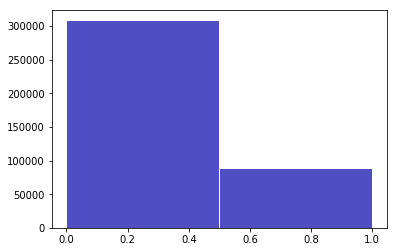

In [11]:
plt.hist(x=df['dwelling_type_null'].dropna(), bins=2, color='#0504aa',
                            alpha=0.7, rwidth=0.99)

In [12]:
import statsmodels.api as sm
model = sm.formula.glm("voted_18g ~ home_purchase_price + age + land_value + estimated_home_value + estimated_median_income",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())
#Why are age and home purchase price the only significant variables?

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               202859
Model:                            GLM   Df Residuals:                   202853
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -289.77
Date:                Tue, 05 Mar 2019   Deviance:                       579.55
Time:                        10:32:09   Pearson chi2:                 1.93e+05
No. Iterations:                    12   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -9.6540      0.984     -9.809      0.000     -11.583      -7.725
home_purchase

In [13]:
import statsmodels.api as sm
model = sm.formula.glm("voted_18g~hh_upscale_buyer+hh_upscale_male_buyer+hh_upscale_female_buyer+hh_book_buyer+hh_family_magazine+hh_female_oriented_magazine+hh_religious_magazine+hh_gardening_magazine+hh_culinary_interest_magazine+hh_health_fitness_magazine+hh_do_it_yourselfer_magazine+hh_financial_magazine+hh_religious_contributor+hh_political_contributer+hh_donates_environment_cause_u+hh_donates_environment_cause_y+hh_donates_environment_cause_null+hh_donates_to_charity_y+hh_donates_to_charity_u+hh_donates_to_charity_null+hh_presence_of_prem_cred_crd_u+hh_presence_of_prem_cred_crd_y+hh_presence_of_prem_cred_crd_null+hh_computer_owner_y+hh_computer_owner_u+hh_computer_owner_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())
#Everything is significant?

/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               208252
Model:                            GLM   Df Residuals:                   208233
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 05 Mar 2019   Deviance:                          nan
Time:                        10:32:29   Pearson chi2:                 1.53e+17
No. Iterations:                   100   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          1.145e+23   2.33e+19   4910.157      0.000    1.14

/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:932: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:932: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:932: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:933: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/m

In [14]:
model = sm.formula.glm("voted_18g~ethnicity_european+ethnicity_likely_african_american+ethnicity_hispanic_and_portuguese+ethnicity_other+ethnicity_east_and_south_asian+ethnicity_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               379034
Model:                            GLM   Df Residuals:                   379028
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -818.71
Date:                Tue, 05 Mar 2019   Deviance:                       1637.4
Time:                        10:32:35   Pearson chi2:                 3.89e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -2.775e+10   5.36e+11     -0.052      0.959   -1.08

In [15]:
model = sm.formula.glm("voted_18g~occupation_industry_other+occupation_industry_medical+occupation_industry_management+occupation_industry_clericaloffice+occupation_industry_manufacturing+occupation_industry_financial_services+occupation_industry_skilled_trades+occupation_industry_education+occupation_industry_military+occupation_industry_computer_professional+occupation_industry_legal+occupation_industry_engineering+occupation_industry_civil_servant+occupation_industry_food_services+occupation_industry_other_other+occupation_industry_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               379034
Model:                            GLM   Df Residuals:                   379017
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -815.70
Date:                Tue, 05 Mar 2019   Deviance:                       1631.4
Time:                        10:32:42   Pearson chi2:                 3.74e+05
No. Iterations:                    27   Covariance Type:             nonrobust
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                   -28.5659   8.33e+04     -